<a href="https://colab.research.google.com/github/isadora-oa/imersao-dados-desafio-final/blob/main/Notebooks/Projeto_final_(en_US).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.pinimg.com/originals/10/40/21/104021b0cc341274872880ebaa39b788.png)

# **Introduction**
---

In general, the science has been developing more and more mostly in consequence of the technological progresses, which provides automaticity and more agility to many process. All this progresses provides important discussions about ethic subjects including mental and physical health, however this is another project theme.

Another problem, which also can be a solution, is how to dial with this enormous quantity of data bases, how to treat and process it, for this necessity the Data Science emerge.

This project, based on the [challenge](https://www.kaggle.com/c/lish-moa) proposed by the Laboratory Innovation Science at Harvard, avoids the need to analyze a database of experiments already carried out, without the need to perform several laboratory procedures significantly reducing the time of discovery of new drugs or new biological functions of these compounds, a more recent example is the use of Data Science in the discovery of vaccines, study of drugs and contagion curves in fight against Covid-19.


For this project, therefore, the data analysis libraries [Pandas](https://pandas.pydata.org), [Matplotlib](https://matplotlib.org), [Seaborn](https://seaborn.pydata.org), [NumPy](https://numpy.org) and [Scikit-Learn](https://scikit-learn.org/stable/) were used.


### ***Purpose***

This project aims to make the exploratory analysis of a database (available [here](https://github.com/isadora-oa/imersao-dados-desafio-final/tree/main/Dados)) of experimentally results and to develop/explore Machine Learning models that can assist in the discovery of new compounds for the development of new drugs.


# **Sections**



1.   **Introduction**

2.   **Sections**

3.   **Data Base**

4.   **Data Analysis**

5.   **Machine Learning**

6.   **Conclusion**

7.   **References**




# **Data Base**

For this project we used the data below, available in the [Dados](https://github.com/isadora-oa/imersao-dados-desafio-final/tree/main/Dados) folder of this repository.

**Experimental data**

---
The *id* column represents the *cell cultures* used in the respective experiment, in the *g* columns (gene) are the normalized gene expression data and in the *c* columns (types of cell) are the data normalized to.

In [1]:
# Experimental Data

import pandas as pd
url_dados = 'https://github.com/isadora-oa/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'

# The link is a .zip archive, so it has to be unziped:
dados = pd.read_csv(url_dados, compression = 'zip')

# Columns renamed:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)                #Data base replacement
dados.columns = dados.columns.str.replace('-', '')      #Replace, on the column, the caracter between parentheses

print('Table 1.1: Experimental Data.')
dados

Table 1.1: Experimental Data.


,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...

In [2]:
# Informations about the table 1.1 structure:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


**Data results**

---
In the columns are the data, for each cell culture (*id*), on the *Mechanisms of Action* (moa) for a certain target (proteins, cellular enzymes of the pathogen or human).

Values equal to *0* is for the action mechanisms that were not activated and values equal to *1* is for the action mechanisms that were activated, these assignments were explained during the immersion classes.


In [3]:
# Results data

dados_resultados = pd.read_csv('https://github.com/isadora-oa/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')

print('Table 1.2: Data results.')
dados_resultados

Table 1.2: Data results.


,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Informations about the table 1.2 structure:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


# **Data Analysis**
---


In [5]:
# General statistics data from table 1.1:
print(dados.describe())

print('mean: Arithmetic Mean')
print('std: Standard Deviation')
print('min, 25%, 50%, 75% e max: Related to Boxplots graphics')

              tempo            g0  ...           c98           c99
count  23814.000000  23814.000000  ...  23814.000000  23814.000000
mean      48.020156      0.248366  ...     -0.470252     -0.301505
std       19.402807      1.393399  ...      1.834828      1.407918
min       24.000000     -5.513000  ...    -10.000000    -10.000000
25%       24.000000     -0.473075  ...     -0.592600     -0.562900
50%       48.000000     -0.008850  ...      0.014000     -0.019500
75%       72.000000      0.525700  ...      0.461275      0.438650
max       72.000000     10.000000  ...      3.111000      3.805000

[8 rows x 873 columns]
mean: Arithmetic Mean
std: Standard Deviation
min, 25%, 50%, 75% e max: Related to Boxplots graphics


Initially, the information contained in each column of Table 1.1 of the **experimental data**, such as quantity and type of data, was evaluated using the commands `value_counts()` and `unique()`/`nunique()`.

In [6]:
# Treatment column

print('Array:' , dados['tratamento'].unique())  #Print the respective column data
print(dados['tratamento'].value_counts())

print('Respectives percentage quantitys %:')
print(dados['tratamento'].value_counts(normalize=True)*100)

Array: ['com_droga' 'com_controle']
com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64
Respectives percentage quantitys %:
com_droga       92.164273
com_controle     7.835727
Name: tratamento, dtype: float64


In [7]:
# Time column

print(dados['tempo'].value_counts())
print('Respectives percentage quantitys %:')
print(dados['tempo'].value_counts(normalize=True)*100)

48    8250
72    7792
24    7772
Name: tempo, dtype: int64
Respectives percentage quantitys %:
48    34.643487
72    32.720249
24    32.636264
Name: tempo, dtype: float64


In [8]:
# Dose column

print(dados['dose'].value_counts())
print('Respectives percentage quantitys %:')
print(dados['dose'].value_counts(normalize=True)*100)

D1    12147
D2    11667
Name: dose, dtype: int64
Respectives percentage quantitys %:
D1    51.007811
D2    48.992189
Name: dose, dtype: float64


In [9]:
# Compound column

print('Compound quantitys: ', dados['composto'].nunique(),'distinct compounds')
print(dados['composto'].value_counts())

Compound quantitys:  3289 distinct compounds
cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
ede646bcc       1
23458e56a       1
d9fcbe12c       1
89ced6383       1
e3e768009       1
Name: composto, Length: 3289, dtype: int64



The graph below represents the most common compounds in this database.

Graph 1: Relevant compounds.


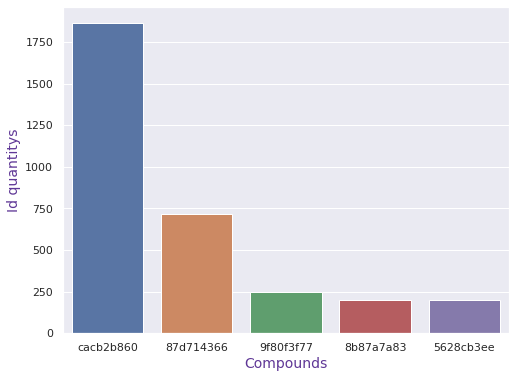

In [10]:
print('Graph 1: Relevant compounds.')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(8, 6))

# Data planning:
cod_compostos = dados['composto'].value_counts().index[0:5]
data = dados.query('composto in @cod_compostos')

# Count and select an certain column data using query method:
ax = sns.countplot(x = 'composto' , data=data , order=cod_compostos)
ax.set_xlabel('Compounds', fontsize=14 , color='#5f3796')
ax.set_ylabel('Id quantitys', fontsize=14 , color='#5f3796')

plt.show()

According to the data, therefore, we know that there are two types of treatment for this data set: *com_controle* (placebo) and *com_droga*, which is related to the compound column; and two different dosages: *D1* and *D2*. In the *time* column are three types of data: *24*, *48* and *72* hours with very close percentages of occurrence.

Thereafter, histograms were then analyzed, still related to the data in Table 1.1.

In [11]:
# Statistics columns g (genes) data. The graphics (1.1, 1.2 e 1.3) will be plot with this data.

print('Table 2.1: Statistic columns g data.')
dados.loc[:, 'g0':'g771'].describe().T
#                   |Total number of genes, informed during the classes.

Table 2.1: Statistic columns g data.


,count,mean,std,min,25%,50%,75%,max
g0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


Histogram 1.1: Columns g (genes) Mean.


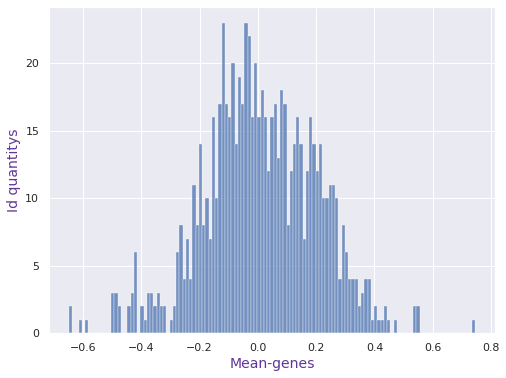

In [12]:
print('Histogram 1.1: Columns g (genes) Mean.')

plt.figure(figsize=(8,6))
ax = sns.histplot(data=dados.loc[:, 'g0':'g771'].describe().T['mean'] , bins=125)

ax.set_xlabel('Mean-genes' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Id quantitys' , fontsize=14 , color='#5f3796')

plt.show()

Histogram 1.2: Columns g (genes) Maximum.


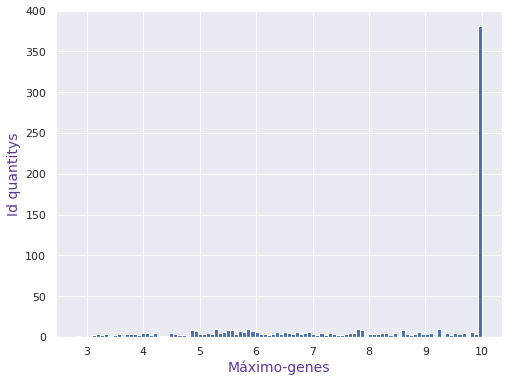

In [13]:
print('Histogram 1.2: Columns g (genes) Maximum.')

plt.figure(figsize=(8,6))
ax = dados.loc[:, 'g0':'g771'].describe().T['max'].hist(bins=100)

ax.set_xlabel('Máximo-genes' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Id quantitys' , fontsize=14 , color='#5f3796')

plt.show()

Histogram 1.3: Columns g (genes) Minimum.


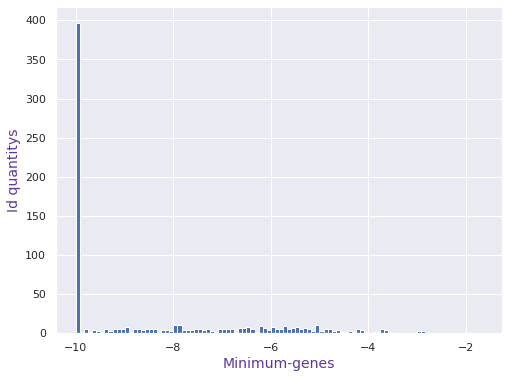

In [14]:
print('Histogram 1.3: Columns g (genes) Minimum.')

plt.figure(figsize=(8,6))
ax = dados.loc[:, 'g0':'g771'].describe().T['min'].hist(bins=100)

ax.set_xlabel('Minimum-genes' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Id quantitys' , fontsize=14 , color='#5f3796')

plt.show()

In [15]:
# The same was done for the columnc c, types of cell:

print('Table 2.2: Statistic columns c data.')
dados.loc[:, 'c0':'c99'].describe().T
#                   |Total number of types of cell, informed during the classes.

Table 2.2: Statistic columns c data.


,count,mean,std,min,25%,50%,75%,max
c0,23814.0,-0.355156,1.752565,-10.0,-0.549300,-0.00900,0.448975,3.365
c1,23814.0,-0.455359,2.004962,-10.0,-0.538425,0.00980,0.476875,3.915
c2,23814.0,-0.480542,2.039346,-10.0,-0.550375,-0.00400,0.460575,2.970
c3,23814.0,-0.377666,1.554583,-10.0,-0.601975,-0.03905,0.413100,2.408
c4,23814.0,-0.493552,2.091888,-10.0,-0.559975,0.01140,0.470300,4.555
...,...,...,...,...,...,...,...,...
c95,23814.0,-0.353726,1.629291,-10.0,-0.567975,-0.01025,0.444750,2.814
c96,23814.0,-0.463485,2.059725,-10.0,-0.552575,-0.00125,0.465225,3.505
c97,23814.0,-0.378241,1.703615,-10.0,-0.561000,-0.00680,0.446400,2.924
c98,23814.0,-0.470252,1.834828,-10.0,-0.592600,0.01400,0.461275,3.111


Histogram 2.1: Columns c (types of cell) Mean.


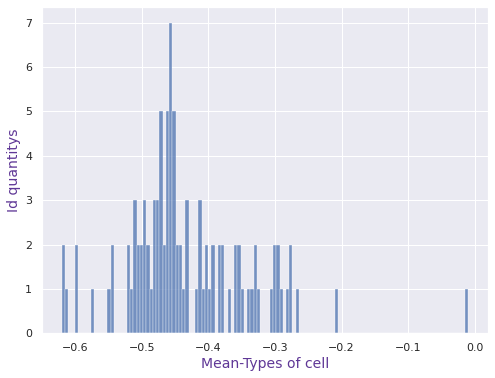

In [16]:
print('Histogram 2.1: Columns c (types of cell) Mean.')

plt.figure(figsize=(8,6))
ax = sns.histplot(data=dados.loc[:, 'c0':'c99'].describe().T['mean'] , bins=125)

ax.set_xlabel('Mean-Types of cell' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Id quantitys' , fontsize=14 , color='#5f3796')

plt.show()

Histogram 2.2: Columns c (types of cell) Maximum.


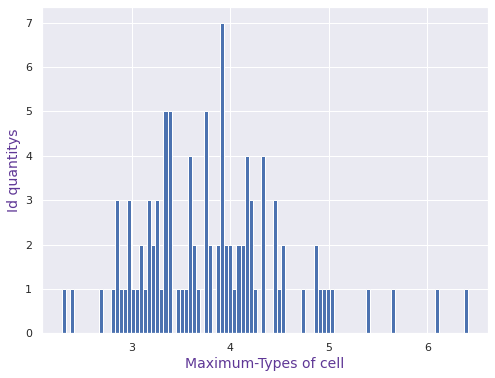

In [17]:
print('Histogram 2.2: Columns c (types of cell) Maximum.')

plt.figure(figsize=(8,6))
ax = dados.loc[:, 'c0':'c99'].describe().T['max'].hist(bins=100)

ax.set_xlabel('Maximum-Types of cell' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Id quantitys' , fontsize=14 , color='#5f3796')

plt.show()

Histogram 2.3: Columns c (types of cell) Minimum.


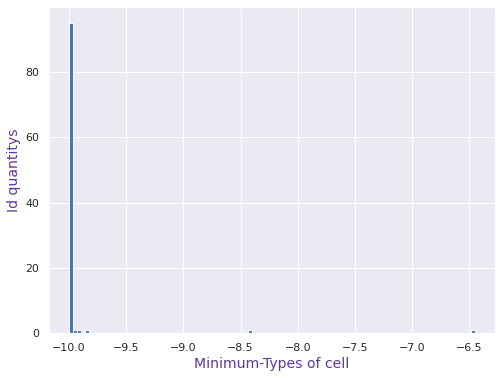

In [18]:
print('Histogram 2.3: Columns c (types of cell) Minimum.')

plt.figure(figsize=(8,6))
ax = dados.loc[:, 'c0':'c99'].describe().T['min'].hist(bins=100)

ax.set_xlabel('Minimum-Types of cell' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Id quantitys' , fontsize=14 , color='#5f3796')

plt.show()

We also note that box-plots charts can be very useful to make analyses comparing two or more parameters of a particular gene or type of cell, as it will be described below.

Boxplot 1.1: g0 gene Mean


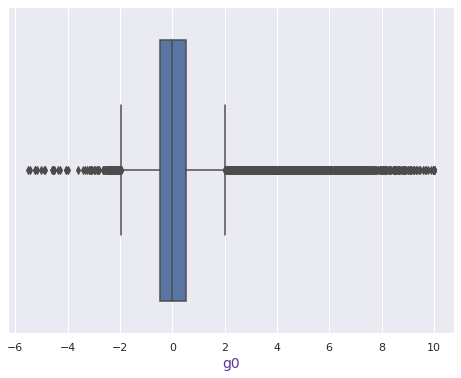

In [19]:
print('Boxplot 1.1: g0 gene Mean')

plt.figure(figsize=(8, 6))
plt.xlabel('', fontsize=14 , color='#5f3796')

sns.boxplot(x='g0' , data=dados)

plt.show()

Boxplot 1.2: Treatment comparative of g0 gene.


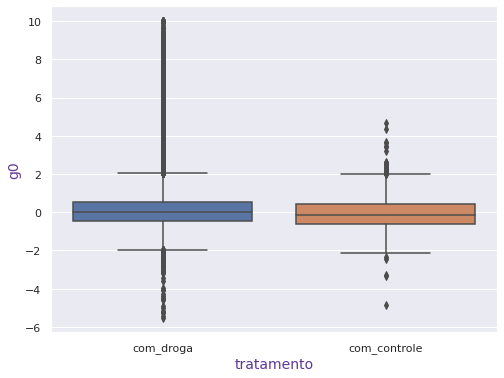

In [20]:
print('Boxplot 1.2: Treatment comparative of g0 gene.')

plt.figure(figsize=(8, 6))
plt.xlabel('', fontsize=14, color='#5f3796')
plt.ylabel('', fontsize=14, color='#5f3796')

sns.boxplot(y='g0', x='tratamento', data=dados)

plt.show()

Boxplot 1.3: Time comparative of g0 gene.


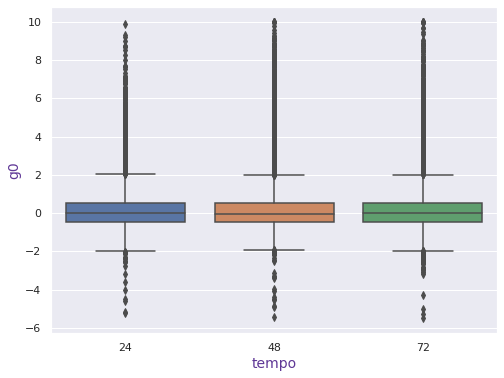

In [21]:
print('Boxplot 1.3: Time comparative of g0 gene.')

plt.figure(figsize=(8, 6))
plt.xlabel('', fontsize=14, color='#5f3796')
plt.ylabel('', fontsize=14, color='#5f3796')

sns.boxplot(y='g0' , x='tempo' , data=dados)

plt.show()

Boxplot 1.4: Dose comparative of g0 gene.


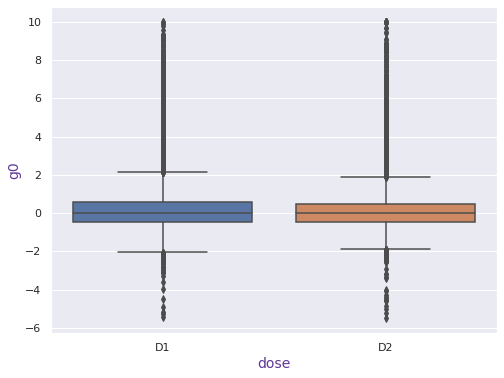

In [22]:
print('Boxplot 1.4: Dose comparative of g0 gene.')

plt.figure(figsize=(8, 6))
plt.xlabel('', fontsize=14, color='#5f3796')
plt.ylabel('', fontsize=14, color='#5f3796')

sns.boxplot(y='g0' , x='dose' , data=dados)

plt.show()

**Correlation between data**

---
The correlations between the *g* and *c* columns data, of genes and cell types, were also analyzed, as described below.

Diagonal correlation matrix graphs were plotted (model code available [here](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) and the values correspond to the respective tables below. And so:

*   Values close to -1 or +1 indicate highly correlated variables;
*   Values close to 0 indicate non-correlated variables;
*   For the negative values (close to -1) the variables are inversely correlated, that is while one increases the other decreases proportionally;
*   For the positive values (close to +1) the variables are directly correlated, i.e., both decrease/increase proportionally;


In [23]:
# Correlation between all conditions (treatment, time, compound and dose) of genes:

print('Table 3.1: Correlation between g columns.')
dados.loc[:, 'g0':'g771'].corr()

Table 3.1: Correlation between g columns.


,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0.000141,-0.172896,-0.324769,-0.291644,0.302912,0.222951,0.144028,-0.020950,0.129354,-

Graph 2.1: Diagonal correlation matrix of g columns.


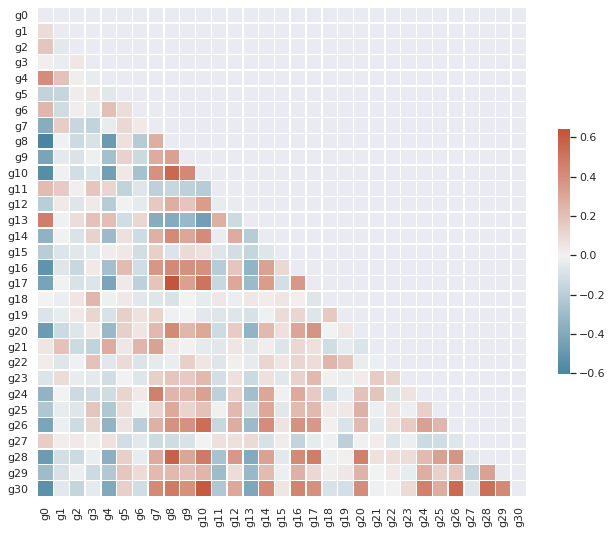

In [24]:
import numpy as np

corr = dados.loc[:, 'g0': 'g30'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, #vmax=.3,(alteration related to graphic scale)
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

print('Graph 2.1: Diagonal correlation matrix of g columns.')
plt.show()

In [25]:
# Correlation between all conditions (treatment, time, compound and dose) of types of cell:

print('Table 3.2: Correlation between c columns.')
dados.loc[:, 'c0':'c99'].corr()

Table 3.2: Correlation between c columns.


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
c0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,0.850533,0.832837,0.808033,0.836838,0.823716,0.827496,0.788947,0.831436,0.797051,0.796719,0.818420,0.823586,0.717807,0.805687,0.836447,0.837448,0.815484,0.840909,0.824231,0.807981,0.818558,0.855363,0.831066,0.820803,0.828947,0.829693,0.839386,0.774960,0.806885,0.849807,...,0.839605,0.846656,0.851796,0.797634,0.820904,0.806811,0.845954,0.825661,0.833020,0.812924,0.814969,0.837019,0.845174,0.847267,0.723442,0.845666,0.761470,0.791360,0.840550,0.812687,0.839668,0.825544,0.844675,0.852891,0.836344,0.859314,0.817635,0.787650,0.838987,0.827124,0.835217,0.832529,0.799196,0.817657,0.846457,0.815499,0.845579,0.834513,0.800682,0.777426
c1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297,0.884532,0.861089,0.880177,0.820911,0.857797,0.771984,0.843076,0.861134,0.820399,0.837626,0.852621,0.756086,0.812062,0.874647,0.829208,0.887230,0.853246,0.861559,0.789314,0.816042,0.889619,0.837788,0.866130,0.865169,0.840517,0.877007,0.779697,0.890506,0.835689,...,0.875778,0.823214,0.889565,0.868589,0.840502,0.856425,0.869802,0.886129,0.834581,0.814084,0.869416,0.826417,0.861290,0.851737,0.725885,0.884601,0.830345,0.846593,0.837897,0.844521,0.842983,0.885487,0.868565,0.870559,0.875755,0.874084,0.818480,0.793513,0.838070,0.811761,0.875405,0.839236,0.876519,0.868431,0.886750,0.803637,0.871383,0.866084,0.815952,0.781510
c2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033,0.904968,0.879638,0.910497,0.841421,0.884464,0.800587,0.879281,0.881011,0.824149,0.853648,0.878793,0.761439,0.832908,0.887800,0.859023,0.899897,0.879307,0.876141,0.824171,0.851934,0.906052,0.850681,0.890263,0.880173,0.852595,0.887820,0.799599,0.905449,0.866557,...,0.897347,0.848344,0.898224,0.887169,0.853978,0.874032,0.894848,0.892008,0.857836,0.838323,0.877652,0.849427,0.891245,0.890797,0.738358,0.892939,0.832679,0.858314,0.866675,0.858469,0.871477,0.899199,0.892636,0.887700,0.896144,0.891606,0.844756,0.800533,0.853413,0.835940,0.902964,0.872660,0.883866,0.885419,0.906584,0.837420,0.898270,0.874869,0.839640,0.802032
c3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465,0.828218,0.803839,0.822104,0.788432,0.818493,0.758345,0.804018,0.806834,0.781198,0.791121,0.816744,0.742109,0.792355,0.828853,0.829277,0.807726,0.816247,0.818892,0.790481,0.796522,0.830602,0.796222,0.804081,0.811296,0.805880,0.820989,0.747433,0.813351,0.827805,...,0.810208,0.797311,0.835446,0.817884,0.810944,0.788175,0.835219,0.813661,0.805820,0.794756,0.782965,0.806491,0.840010,0.824398,0.702892,0.823897,0.765937,0.802952,0.800673,0.803913,0.813930,0.835707,0.819130,0.813694,0.834414,0.819223,0.808987,0.772220,0.811936,0.796889,0.825342,0.813555,0.812200,0.803603,0.830301,0.799760,0.822001,0.814889,0.779998,0.768872
c4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,0.890057,0.904082,0.870384,0.911130,0.839991,0.879147,0.779366,0.879616,0.893702,0.807685,0.833680,0.885335,0.768383,0.854108,0.872477,0.872339,0.900002,0.869316,0.875701,0.808720,0.851560,0.901149,0.836846,0.891190,0.865017,0.851393,0.887747,0.792168,0.900725,0.870204,...,0.885975,0.837735,0.888442,0.900435,0.839403,0.862301,0.903555,0.885107,0.860831,0.835481,0.859855,0.850158,0.881167,0.893576,0.740225,0.882419,0.847703,0.847125,0.856590,0.862995,0.862491,0.903756,0.902625,0.879256,0.893951,0.882537,0.839999,0.779533,0.843129,0.816772,0.895967,0.890255,0.882185,0.868684,0.900309,0.839111,0.901603,0.873534,0.834823,0.795218
...,...,...,...,...,...,...,...,...,...,...,...,..

Graph 2.2: Diagonal correlation matrix of c columns.


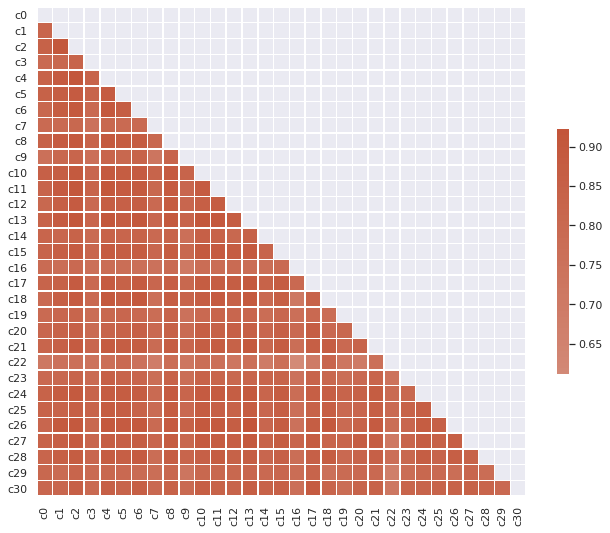

In [26]:
corr = dados.loc[:, 'c0': 'c30'].corr()  #Select which data will be plot
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

print('Graph 2.2: Diagonal correlation matrix of c columns.')
plt.show()

In [27]:
# Correlation between all conditions (treatment, time, compound and dose) of genes and types of cell:

corr_gc = dados.loc[:,'g0':'c99'].corr()
print('Table 3.3: Correlation between g and c columns.')
corr_gc

Table 3.3: Correlation between g and c columns.


,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,-0.662186,-0.639153,-0.665249,-0.604982,-0.621192,-0.646914,-0.630096,-0.625521,-0.643556,-0.622139,-0.655613,-0.637361,-0.669361,-0.666255,-0.541994,-0.660842,-0.540702,-0.647280,-0.670072,-0.592806,-0.644508,-0.577032,-0.621314,-0.673295,-0.588529,-0.660818,-0.625025,-0.625130,-0.627185,-0.682893,-0.648726,-0.629025,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.040883,-0.027389,-0.013518,-0.005513,0.004970,0.000605,0.005983,-0.025452,-0.014658,-0.016301,-0.035473,0.004021,-0.041172,-0.023066,0.004179,-0.020136,0.023721,-0.003363,-0.044079,0.006385,-0.004805,-0.010185,0.002633,-0.022321,-0.018388,-0.020843,-0.016555,0.011173,-0.037424,-0.008322,-0.034557,-0.000934,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,-0.179885,-0.183319,-0.185323,-0.174439,-0.163617,-0.174381,-0.185913,-0.166461,-0.181092,-0.167242,-0.180925,-0.178400,-0.175939,-0.182079,-0.151960,-0.183145,-0.181286,-0.159720,-0.179919,-0.162542,-0.183613,-0.170641,-0.186154,-0.177631,-0.166103,-0.187158,-0.157164,-0.170382,-0.164975,-0.174041,-0.183325,-0.186048,-0.166786,-0.190383,-0.178312,-0.158105,-0.182540,-0.178812,-0.170152,-0.172124
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,-0.115228,-0.037189,-0.077496,-0.060176,-0.026180,-0.099132,-0.026693,-0.060265,-0.036769,-0.045193,-0.140946,-0.026295,-0.076285,-0.055792,-0.035812,-0.078715,-0.050296,-0.071568,-0.078478,-0.046407,-0.033641,-0.064704,-0.044155,-0.083462,-0.028035,-0.063797,-0.039701,0.010285,-0.047301,-0.066781,-0.091892,-0.045385,-0.089801,-0.089818,-0.081073,-0.016778,-0.083846,-0.049951,-0.079855,-0.037579
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,-0.399687,-0.402933,-0.360525,-0.335792,-0.392328,-0.365328,-0.358876,-0.379927,-0.393416,-0.380265,-0.378893,-0.396324,-0.407893,-0.396741

Graph 2.3: Diagonal correlation matrix of g and c columns.


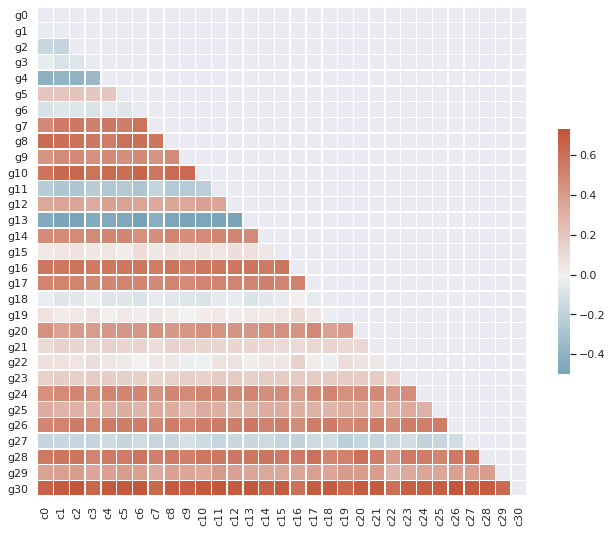

In [28]:
corr = corr_gc.loc['g0':'g30','c0':'c30']
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

print('Graph 2.3: Diagonal correlation matrix of g and c columns.')
plt.show()

Types of cell influence the survival of the organism and are correlated, that is, if one type of cell is affected or not probably the others will also have the same behavior, as shown in Graph 2.2.

The higher or lower correlation does not necessarily imply the causality of the event. It is necessary to analyze other factors to reach a consensus on causality.

For the data results (Table 1.2) the following analyses were performed:

In [29]:
# Which cell cultures was or wasn`t activated according to each mechanisms of action (moa)?

dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['active_moa'] = (dados_resultados['n_moa'] != 0)

print('Which cell cultures (id) was or wasn`t activated:')
print(dados_resultados['active_moa'].head()) 
print('How many times the cell culture was activated:')
print(dados_resultados['n_moa'].head())
print('Legenda: True -- activate; False -- not activate')

Which cell cultures (id) was or wasn`t activated:
0     True
1    False
2     True
3    False
4     True
Name: active_moa, dtype: bool
How many times the cell culture was activated:
0    1
1    0
2    3
3    0
4    1
Name: n_moa, dtype: int64
Legenda: True -- activate; False -- not activate


With this, it is possible to add these two new columns to the results data table (Table 1.2).

In [30]:
dados_resultados['active_moa'] = (dados_resultados['n_moa'] != 0)

print('Table 4: Data results with active_moa and n_moa columns.')
dados_resultados

Table 4: Data results with active_moa and n_moa columns.


,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,active_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [31]:
# What is the most activated moa for the entire data base?

contagem_moa = dados_resultados.select_dtypes('int64').drop('n_moa', axis=1).sum().sort_values(ascending=False)
#                                                                                                 |descending order results
print('20 most activated moa`s:')
contagem_moa.head(20)

20 most activated moa`s:


nfkb_inhibitor                       832
proteasome_inhibitor                 726
cyclooxygenase_inhibitor             435
dopamine_receptor_antagonist         424
serotonin_receptor_antagonist        404
dna_inhibitor                        402
glutamate_receptor_antagonist        367
adrenergic_receptor_antagonist       360
cdk_inhibitor                        340
egfr_inhibitor                       336
tubulin_inhibitor                    316
acetylcholine_receptor_antagonist    301
pdgfr_inhibitor                      297
hmgcr_inhibitor                      283
calcium_channel_blocker              281
flt3_inhibitor                       279
kit_inhibitor                        273
adrenergic_receptor_agonist          270
sodium_channel_inhibitor             267
glucocorticoid_receptor_agonist      266
dtype: int64

As the above result shows, the biggest activator was the *nfkb_inhibitor* which has the inhibitory interaction, but there are other types of moa with relevant results as well and that can be very important for subsequent experiments.

Therefore, these data were analyzed separately.

In [32]:
# Inhibitors

print('Most activated moa`s inhibitors:')
contagem_moa.filter(like='inhibitor').head(5)

Most activated moa`s inhibitors:


nfkb_inhibitor              832
proteasome_inhibitor        726
cyclooxygenase_inhibitor    435
dna_inhibitor               402
cdk_inhibitor               340
dtype: int64

In [33]:
# Receptor antagonists

print('Most activated moa`s antagonists:')
contagem_moa.filter(like='antagonist').head(5)

Most activated moa`s antagonists:


dopamine_receptor_antagonist         424
serotonin_receptor_antagonist        404
glutamate_receptor_antagonist        367
adrenergic_receptor_antagonist       360
acetylcholine_receptor_antagonist    301
dtype: int64

In [34]:
# Receptor agonists

print('Most activated moa`s agonists:')
contagem_moa.filter(like='_agonist').head(5)

Most activated moa`s agonists:


adrenergic_receptor_agonist        270
glucocorticoid_receptor_agonist    266
serotonin_receptor_agonist         236
acetylcholine_receptor_agonist     190
estrogen_receptor_agonist          158
dtype: int64

In [35]:
# Blockers

print('Most activated moa`s blockers:')
contagem_moa.filter(like='blocker').head(5)

Most activated moa`s blockers:


calcium_channel_blocker     281
chloride_channel_blocker     42
dtype: int64

As seen before, Graph 1, the compound *cacb2b860* is the most frequent in this database and also the only compound used in the treatment *com_controle*, as discussed during classes, so it can not activate any moa. The following code was used to verify this statement.

In [36]:
# First is necessary combine the data from the data base tables (1.1 e 1.2).
# For it uses the merge():

dados_combinados = pd.merge(dados, dados_resultados[['id', 'n_moa', 'active_moa']], on='id')
#                                                                                   |Primary key

print('Table 1.3: Combined data.')
dados_combinados

Table 1.3: Combined data.


,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,active_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,-0.0895,0.4420,0.9641,-0.184

In [37]:
# To find out if all com_controle treatment moa's are 0/False:

print('Activated moa´s of com_controle treatment? ' , dados_combinados.query('tratamento == "com_controle"')['active_moa'].value_counts())
print(dados_combinados.query('tratamento == "com_controle"'))

Activated moa´s of com_controle treatment?  False    1866
Name: active_moa, dtype: int64
                 id    tratamento  tempo  ...     c99 n_moa  active_moa
25     id_0054388ec  com_controle     48  ...  1.0050     0       False
38     id_0079af0fb  com_controle     24  ... -1.4820     0       False
40     id_007bfbb91  com_controle     24  ...  0.9180     0       False
47     id_008a986b7  com_controle     48  ... -0.9367     0       False
63     id_009d8340f  com_controle     24  ...  0.9364     0       False
...             ...           ...    ...  ...     ...   ...         ...
23729  id_ff1f9e5fc  com_controle     24  ...  0.0457     0       False
23747  id_ff469c482  com_controle     72  ... -0.6777     0       False
23768  id_ff89331ca  com_controle     72  ... -0.3626     0       False
23793  id_ffd26f361  com_controle     48  ...  0.7082     0       False
23811  id_fffc1c3f4  com_controle     48  ...  0.3808     0       False

[1866 rows x 879 columns]


With these results it is also proven that only the compound *cacb2b860* is used in the treatment *com_controle*, because the amount of moa that were not active is equal to the total amount of times that this compound appears in the database: *1866*.

With this same logic, it is possible to know which compounds (*com_droga* treatment) did not have active moa. As the results below show.

In [38]:
print(dados_combinados.query('tratamento == "com_droga"'))
print('com_droga treatment effect:')
print(dados_combinados.query('tratamento == "com_droga"')['active_moa'].value_counts())

                 id tratamento  tempo dose  ...     c98     c99  n_moa  active_moa
0      id_000644bb2  com_droga     24   D1  ...  0.3801  0.4176      1        True
1      id_000779bfc  com_droga     72   D1  ...  0.6077  0.7371      0       False
2      id_000a6266a  com_droga     48   D1  ... -1.4080  0.6931      3        True
3      id_0015fd391  com_droga     48   D1  ... -0.3876 -0.8154      0       False
4      id_001626bd3  com_droga     72   D2  ... -0.3786  0.7125      1        True
...             ...        ...    ...  ...  ...     ...     ...    ...         ...
23808  id_fff8c2444  com_droga     72   D1  ... -0.4259  0.2434      1        True
23809  id_fffb1ceed  com_droga     24   D2  ...  0.5258  0.4680      1        True
23810  id_fffb70c0c  com_droga     24   D2  ... -0.2715  0.3689      1        True
23812  id_fffcb9e7c  com_droga     24   D1  ... -0.6290  0.0740      1        True
23813  id_ffffdd77b  com_droga     72   D1  ... -2.1500 -4.2520      0       False

[21

With this, it is possible to do a more detailed analysis for each gene or type of cell individually according to the interest, as the following example shows.

Boxplot 2.1: Moa of g0 treatment.


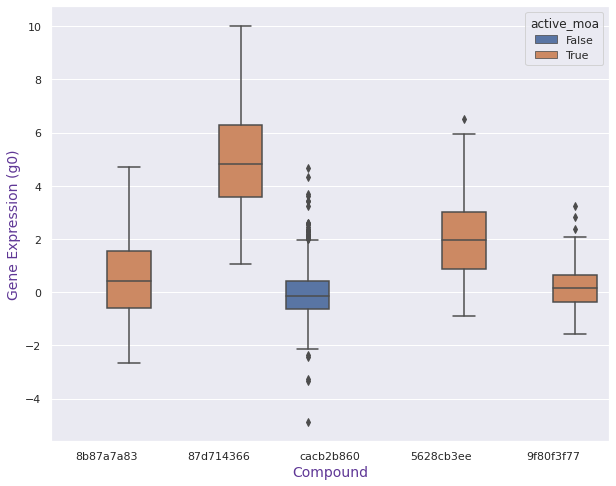

In [39]:
plt.figure(figsize=(10,8))
compostos_principais = dados_combinados['composto'].value_counts().index[:5]
ax = sns.boxplot(data=dados_combinados.query('composto in @compostos_principais'), y='g0', x='composto', hue='active_moa')

ax.set_xlabel('Compound', fontsize=14, color='#5f3796')
ax.set_ylabel('Gene Expression (g0)', fontsize=14, color='#5f3796')

print('Boxplot 2.1: Moa of g0 treatment.')
plt.show()

As Boxplot 2.1 shows, the compound *9f80f3f77* is similar to the compound *cacb2b860* (with *active_moa*: False), used for *com_controle* treatment, which may be an indication that it is a compound with not very considerable effect. The result True (activated mechanism of action) can occur due to the cell line of this gene (*g0*), that is, it can be related to the result of other genes.

We can also check whether some compound, in the *com_controle* treatment activated some moa depending on the condition of the experiment (time, dose) or not.

In [40]:
#variables
composto_ativa = dados_combinados.query('active_moa == True')
composto_nao_ativa = dados_combinados.query('active_moa == False')

#merge() as primary key
composto_ativa_nao_ativa = pd.merge(composto_ativa, composto_nao_ativa, on=['composto'], how='outer', indicator=True)

composto_ativa_nao_ativa['_merge'].value_counts()

left_only     14447
right_only     9367
both              0
Name: _merge, dtype: int64

As the result shows for both cases, i.e., when the moa is active (*True*) and not active (*False*) for some experimental condition (time, dose) no data is found in the table (*both: 0*). Therefore, none of the compounds activates or not activates the moa depending on the experimental condition.

This analysis can also be done individually, for each gene or type of cell, depending on what is being studied. As the example below shows:


Boxplot 2.2: Time comparative.


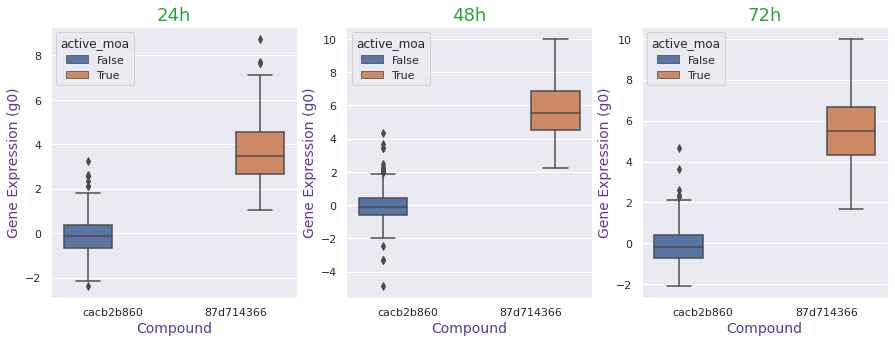

In [41]:
# Boxplots of time

# Data planning:
compostos_principais = dados_combinados['composto'].value_counts().index[0:2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais & tempo == 24'), y= 'g0', x='composto',
            hue='active_moa', order=compostos_principais, ax=ax1)
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais & tempo == 48'), y= 'g0', x='composto',
            hue='active_moa', order=compostos_principais, ax=ax2)
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais & tempo == 72'), y= 'g0', x='composto',
            hue='active_moa', order=compostos_principais, ax=ax3)

# Set up:
ax1.set_title('24h', fontsize=18, color='#2ca33a')
ax1.set_xlabel('Compound', fontsize=14, color='#5f3796')
ax1.set_ylabel('Gene Expression (g0)', fontsize=14, color='#5f3796')

ax2.set_title('48h', fontsize=18, color='#2ca33a')
ax2.set_xlabel('Compound', fontsize=14, color='#5f3796')
ax2.set_ylabel('Gene Expression (g0)', fontsize=14, color='#5f3796')

ax3.set_title('72h', fontsize=18, color='#2ca33a')
ax3.set_xlabel('Compound', fontsize=14, color='#5f3796')
ax3.set_ylabel('Gene Expression (g0)', fontsize=14, color='#5f3796')

print('Boxplot 2.2: Time comparative.')
plt.show()

Boxplot 2.3: Doses comparative.


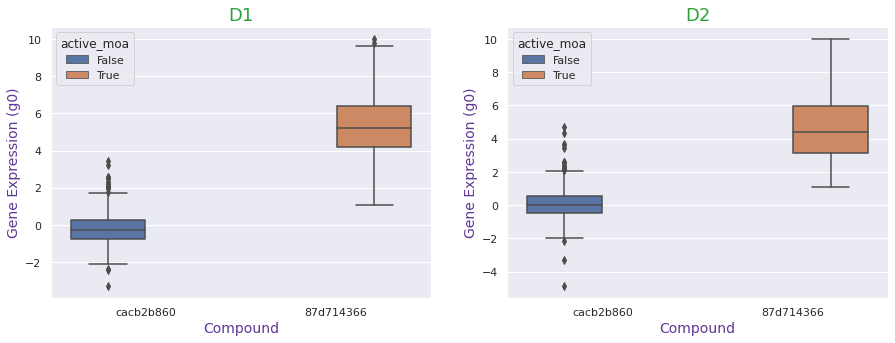

In [42]:
# Boxplots of dose

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais & dose == "D1"'), y= 'g0', x='composto',
            hue='active_moa', order=compostos_principais, ax=ax1)
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais & dose == "D2"'), y= 'g0', x='composto',
            hue='active_moa', order=compostos_principais, ax=ax2)

ax1.set_title('D1', fontsize=18, color='#2ca33a')
ax1.set_xlabel('Compound', fontsize=14, color='#5f3796')
ax1.set_ylabel('Gene Expression (g0)', fontsize=14, color='#5f3796')

ax2.set_title('D2', fontsize=18, color='#2ca33a')
ax2.set_xlabel('Compound', fontsize=14, color='#5f3796')
ax2.set_ylabel('Gene Expression (g0)', fontsize=14, color='#5f3796')

print('Boxplot 2.3: Doses comparative.')
plt.show()

# **Machine Learning**
---

The source of knowledge of the ML model used for this project is the new database *dados_combinados* created previously (Table 1.3), which will make a classification of which moa were activated or not and which compound is responsible for activation, therefore, each experiment (referring to the *id*) will have a signature that will serve as a basis for the prediction of new compounds that can be added to this database.

In [43]:
print('Table 1.3: Combined data.')
dados_combinados

Table 1.3: Combined data.


,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,active_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,-0.0895,0.4420,0.9641,-0.184

We use the **Logistic Regression** model of the **Scikit-Learn** library. 20% of the *dados_combinados* database was used as a test base, `y` being the *active_moa* as a function of `x` (*dados_combinados*), i.e., `y` is defined from columns *g* and *c*.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#variables
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['active_moa']

#training base
x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=376)
#                                                                 |data % used for test

print('Test result:')
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_test, y_test)

Test result:


0.6267058576527399

The test result indicates that the accuracy of this model is *62.67%*, that is, approximately 63% of the new compounds added will have the moa data corresponding to reality.

For this and the other moa activation prediction models discussed during the class, the accuracy percentages have very close values, around 60%, since they are very basic models. However, for this type of data, much greater accuracy is required, since it is an experimental data that directly interfere with the health and safety of people's lives.


# **Conclusion**
---


This project highlights the importance of Data Science currently, we observe that it is possible to know what types of treatments were used in a given experiment, the frequency/proportion with which determined data are repeated and select the required data, what is the best graph to represent a given set of data for an enormous amount of data and experimental results in a very small time interval. It is also possible to observe the potential of this science, of these analyses that not only bring crucial information but can also make predictions, as the use of Machine Learning tools, depending on the available database.

# **References**
---

*   *Use Computer Vision to Capture Real-World Events. Available on: https://towardsdatascience.com/tagged/covid19. Access in 13/05/2021.*
*   *Como a ciência de dados vem ajudando na luta contra a COVID-19 (portuguese-BR post). Available on: https://www.criteo.com/br/blog/como-a-ciencia-de-dados-vem-ajudando-na-luta-contra-o-covid-19/. Access in 13/05/2021.*